# 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기

## Project 1-1

1. 높은 해상도 이미지 불러오기
2. 이미지의 크기를 1/4로 줄이고 그때 bicubic interpolation 적용하기
3. SRGAN으로 고해상도 이미지 생성 (apply_srgan)
4. bicubic interpolation을 해서 다시 4배 하기
5. bicubic, srgan, 원래해상도 3가지를 비교하기

### 1. Image load

height: 2400, width: 3840


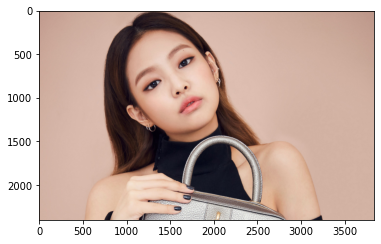

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("jennie.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:-1]

plt.imshow(image)
print(f"height: {height}, width: {width}")

### 2. Resize 1/4 times (Bicubic interpolation)

In [2]:
resized_image = cv2.resize(image, (width//4, height//4), interpolation=cv2.INTER_CUBIC)
resized_image.shape

(600, 960, 3)

### 3. Generate high quality image (SRGAN)

In [4]:
import tensorflow as tf
import os
import numpy as np


model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [3]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [5]:
srgan_image = apply_srgan(resized_image)
srgan_image.shape

In [8]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

### 4. Resize 4 times (Bicubic interpolation)

In [6]:
bicubic_image = cv2.resize(resized_image, (width, height), interpolation=cv2.INTER_CUBIC)
bicubic_image.shape

(2400, 3840, 3)

### 5. Compare (Bicubic vs SRGAN vs HR)

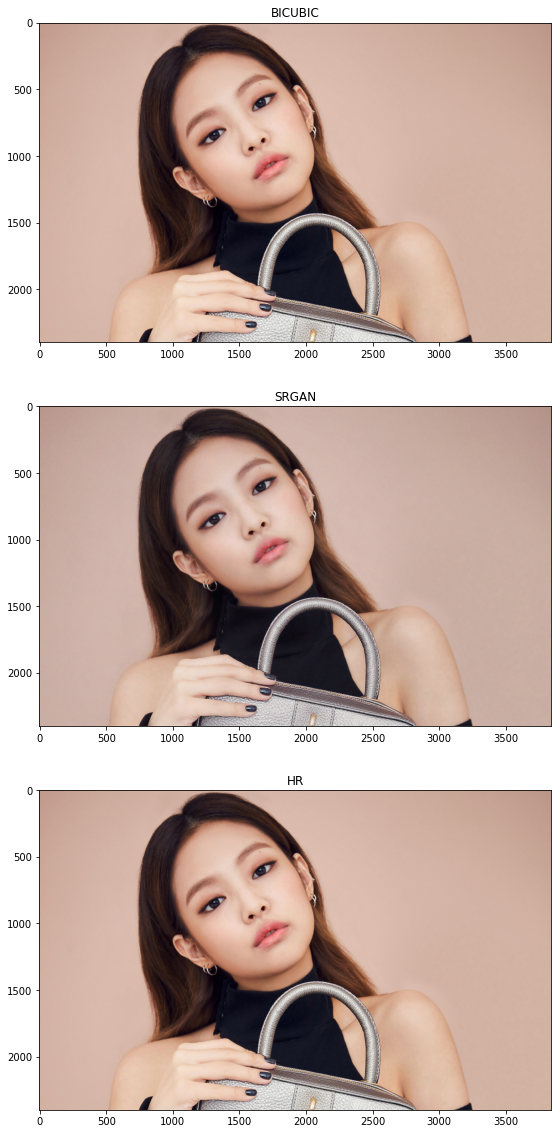

In [7]:
plt.figure(figsize=(30, 20))
images = [bicubic_image, srgan_image, image]
title = ['BICUBIC', "SRGAN", "HR"]
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.title(title[i])
    plt.imshow(images[i])

## Project 1-2

1. 낮은 해상도 이미지 불러오기
2. SRGAN으로 고해상도 이미지 생성
3. bicubic interpolation 적용해 4배하기
4. 2가지 결과 비교하기

### 1. Image load

height: 218, width: 225


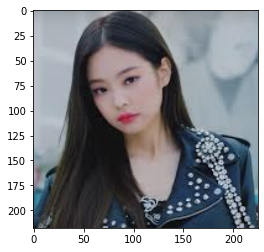

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

image = cv2.imread("jennie-small.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:-1]

plt.imshow(image)
print(f"height: {height}, width: {width}")

### 2. Generate high quality image (SRGAN)

In [7]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [8]:
srgan_image = apply_srgan(image)
srgan_image.shape

(872, 900, 3)

### 3. Resize 4 times (Bicubic interpolation)

In [9]:
bicubic_image = cv2.resize(image, (width * 4, height * 4), interpolation=cv2.INTER_CUBIC)
bicubic_image.shape

(872, 900, 3)

### 4. Compare (Bicubic vs SRGAN)

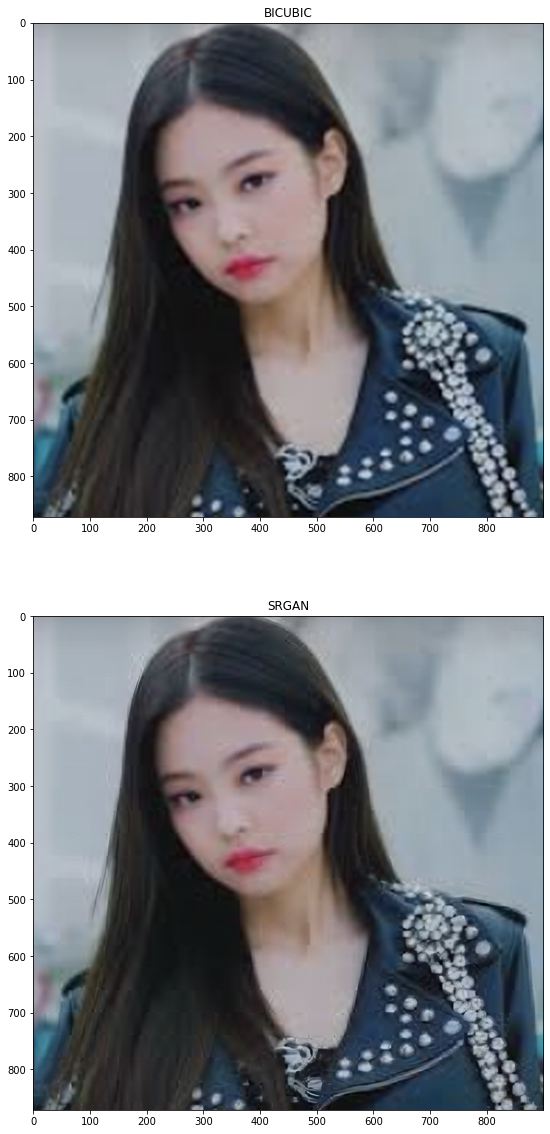

In [10]:
plt.figure(figsize=(30, 20))
images = [bicubic_image, srgan_image]
title = ['BICUBIC', "SRGAN"]
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.title(title[i])
    plt.imshow(images[i])

# Project 2 : SRGAN을 이용해 고해상도 gif 생성하기

1. gif 파일 불러오기
2. 프레임 별 SR 진행하기
3. 프레임을 다시 합쳐 gif 만들기


In [14]:
import cv2

gif = cv2.VideoCapture("book_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 22
frame 크기 : (215, 380, 3)


In [17]:
srgan_frames = [apply_srgan(frame) for frame in frames]

In [19]:
import imageio

imageio.mimsave("book_lr_srgan.gif", srgan_frames)

| Origin | Srgan |
| --- | --- |
| <img src='book_lr.gif' width="300"/> | <img src='book_lr_srgan.gif' width="300"/> |